In [1]:
# -*- coding: utf-8 -*-

In [2]:
# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import external modules
import numpy as np
import matplotlib.pyplot as plt

# import internal modules
from proj1_helpers import load_csv_data 
from implementations import *

# Load Data

In [3]:
y, input_data, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [4]:
np.shape(input_data)

(250000, 30)

# Process the Counting -999

In [5]:
nine_count = []

for i in range(0, np.shape(input_data)[1],1):
    nine_count.append(np.shape(np.where((input_data.T)[i]==-999))[1])

print(nine_count)

[38114, 0, 0, 0, 177457, 177457, 177457, 0, 0, 0, 0, 0, 177457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99913, 99913, 99913, 177457, 177457, 177457, 0]


# Removal of the -999 lines

In [6]:
print(np.where((input_data.T)[:]==-999))

X_no_999 = np.delete(input_data, np.where((input_data.T)[:]==-999), axis=0)
y_no_999 = np.delete(y, np.where((input_data.T)[:]==-999), axis=0)

np.shape(X_no_999)
np.shape(y_no_999)


(array([ 0,  0,  0, ..., 28, 28, 28], dtype=int64), array([     2,     10,     14, ..., 249997, 249998, 249999], dtype=int64))


(68109,)

# Plotting distributions vs. log-distributions

Problems: 
-negative numbers cannot be logged, for now i did abs but it's not fair.
-zero can't be logged, i added one.

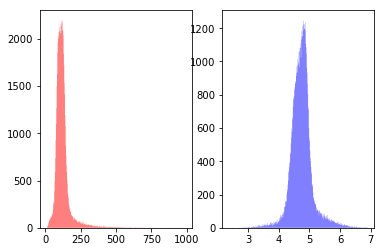

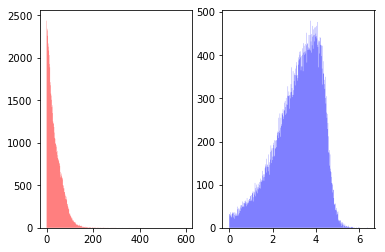

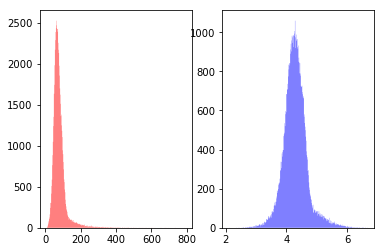

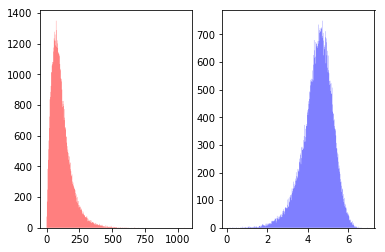

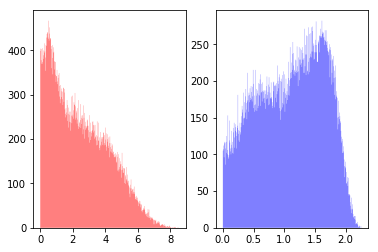

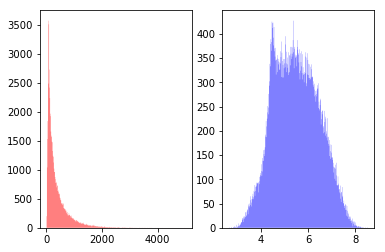

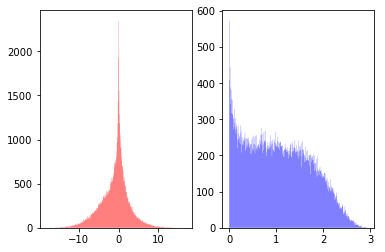

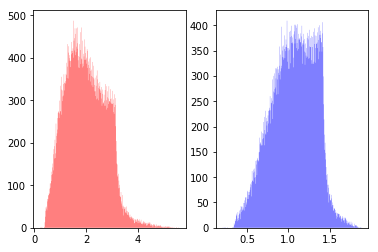

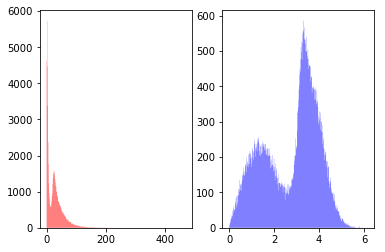

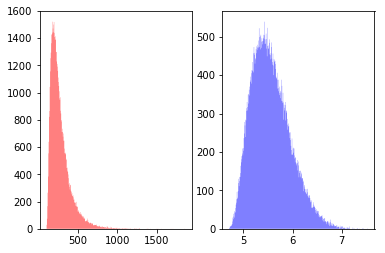

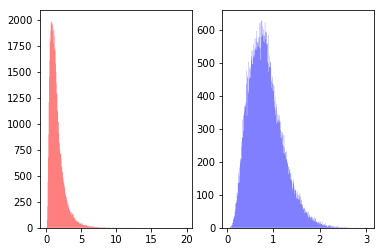

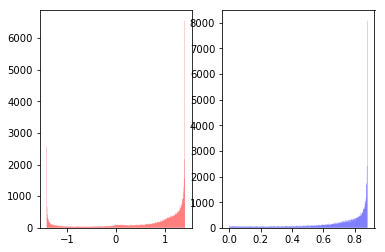

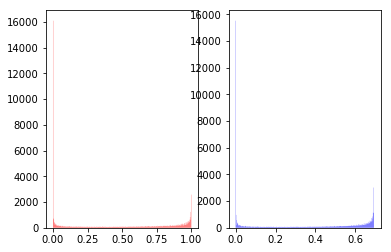

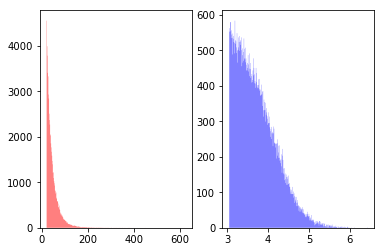

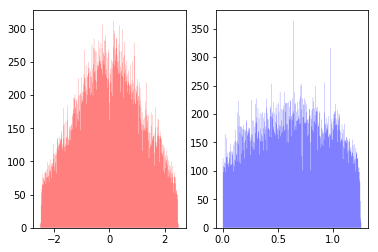

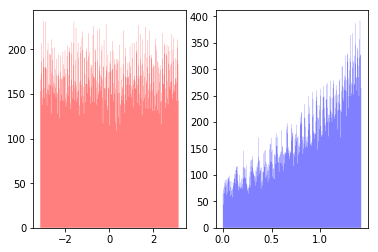

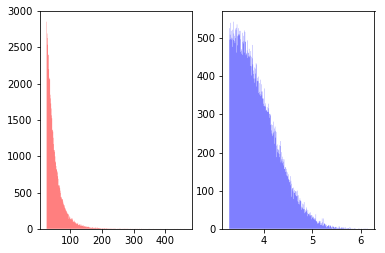

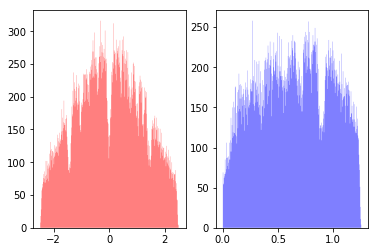

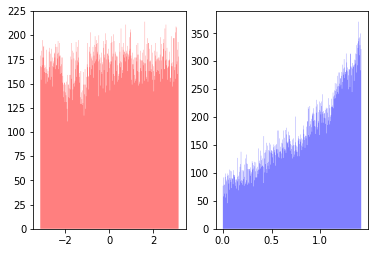

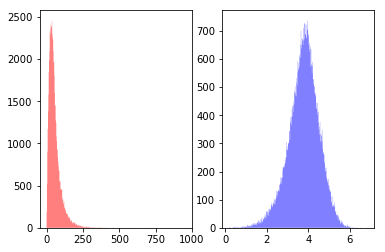

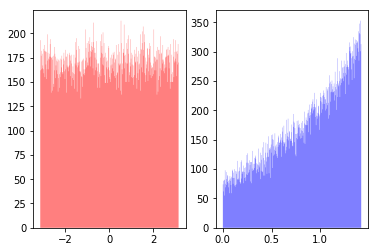

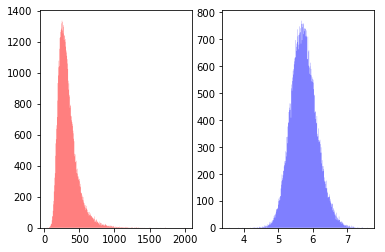

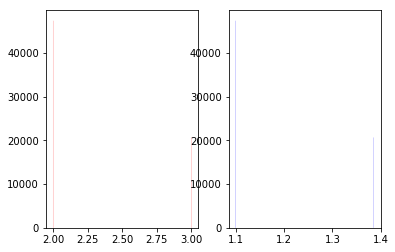

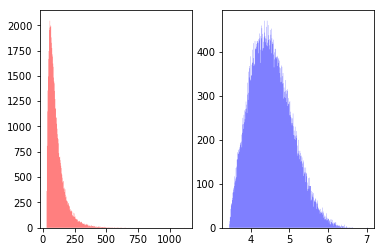

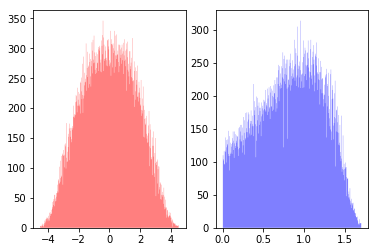

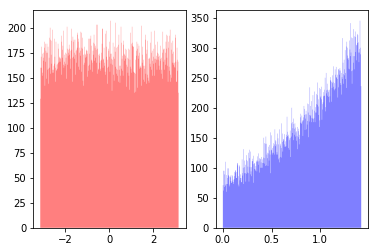

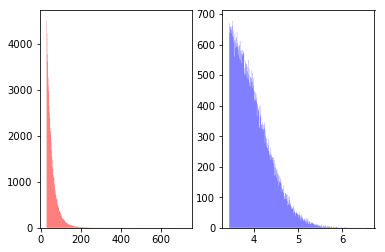

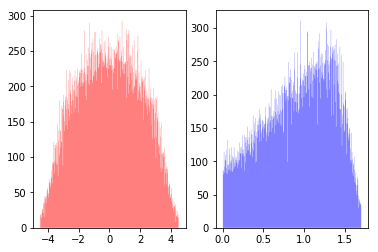

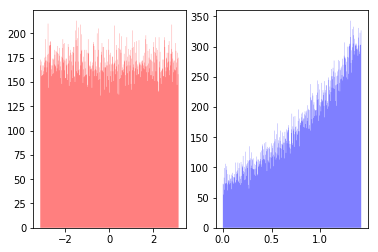

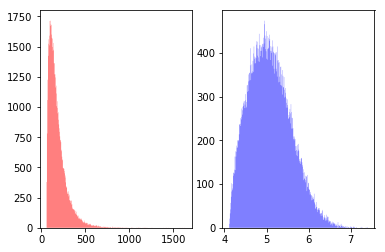

In [7]:
for i in range(0, np.shape(input_data)[1],1):
    plt.subplot(121)
    plt.hist([(X_no_999.T)[i]], bins=400, log=False,color='r', alpha=0.5,histtype='stepfilled')
    plt.subplot(122)
    plt.hist([np.log(1+np.abs(X_no_999.T)[i])], bins=400, log=False,color='b', alpha=0.5,histtype='stepfilled')
    plt.show()

# Separate PRI and DER in the input data

In [13]:
# names of the features 
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]
print(featureNames)

# derived features from primitive data
x_der = X_no_999[:,:13]

# primitive data
x_pri = X_no_999[:,13:]

print("all: ", X_no_999.shape)
print("der: ",x_der.shape)
print("pri: ",x_pri.shape)
print("labels: ",y_no_999.shape)

['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
all:  (68109, 30)
der:  (68109, 13)
pri:  (68109, 17)
labels:  (68109,)


# Plotting data points in feature spaces

In [15]:
def plotInFeatureSpace(samples, labels, ind1, ind2, featureNames):
    
    # extract feature 1 and feature 2 at index 'ind1' and 'ind2' in 'samples'
    F1 = samples[:, ind1]
    F2 = samples[:, ind2]
    
    # get background event in F1 and F2 (the label in 'labels' is -1)
    ind_background = np.where(labels == -1)
    F1_background = F1[ind_background]
    F2_background = F2[ind_background]
    
    # get signal event in F1 and F2 (the label in 'labels' is +1)
    ind_signal = np.where(labels == 1)
    F1_signal = F1[ind_signal]
    F2_signal = F2[ind_signal]

    # plot background
    plt.subplot(121)
    plt.plot(F1_background, F2_background, 'o', color='blue')
    plt.plot(F1_signal, F2_signal, '*', color='red')
    plt.legend(("background", "signal"))
    plt.xlabel(featureNames[ind1])
    plt.ylabel(featureNames[ind2])
    
    # plot signal (higgs boson signature)
    plt.subplot(122)
    plt.plot(F1_signal, F2_signal, '*', color='red')
    plt.plot(F1_background, F2_background, 'o', color='blue')
    plt.legend(("signal", "background"))
    plt.xlabel(featureNames[ind1])
    plt.ylabel(featureNames[ind2])
    
    plt.show()


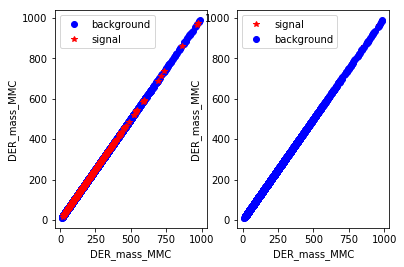

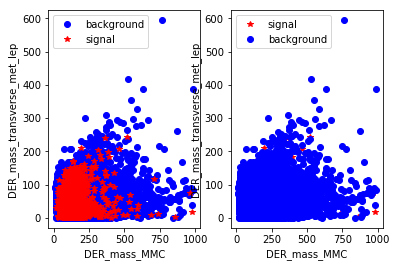

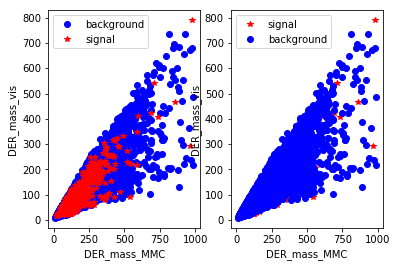

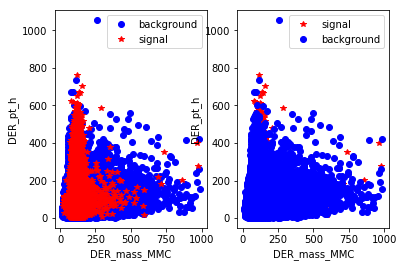

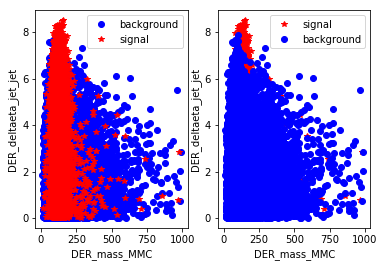

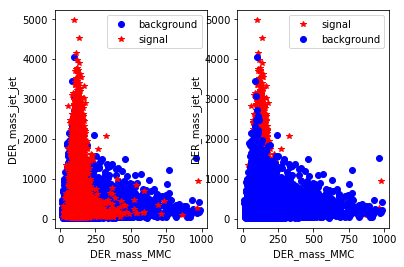

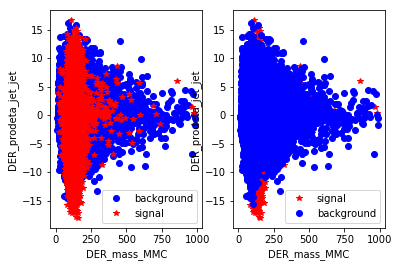

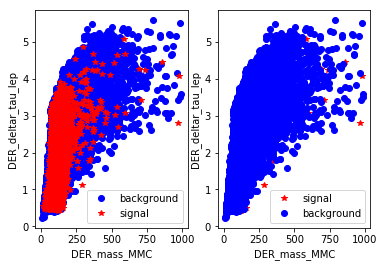

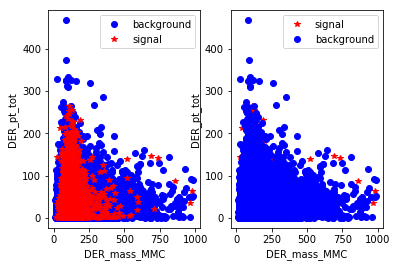

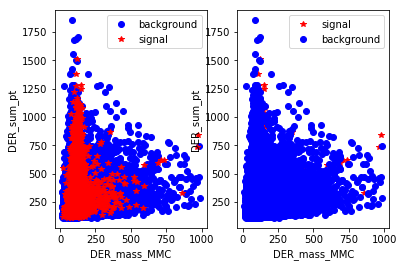

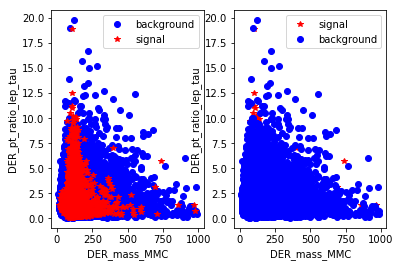

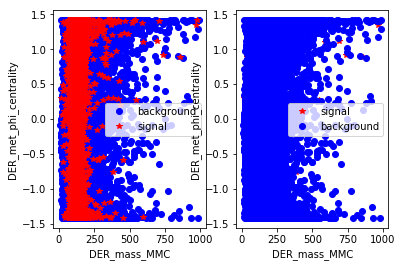

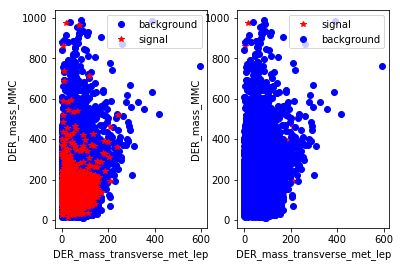

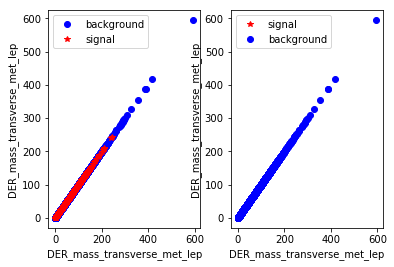

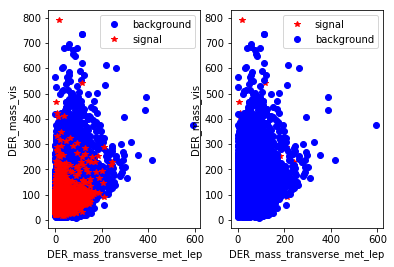

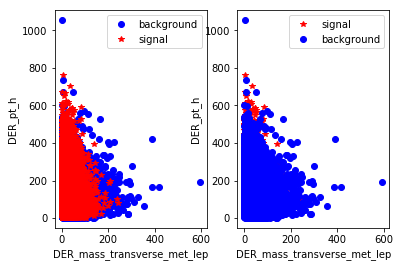

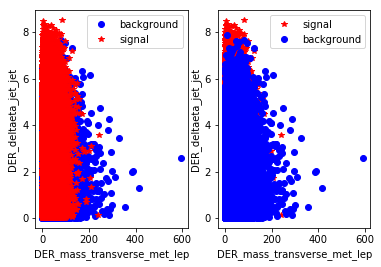

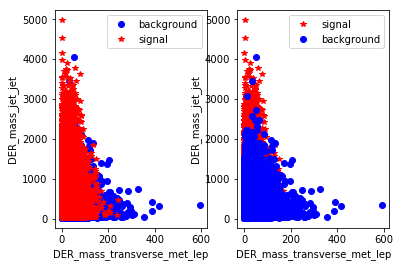

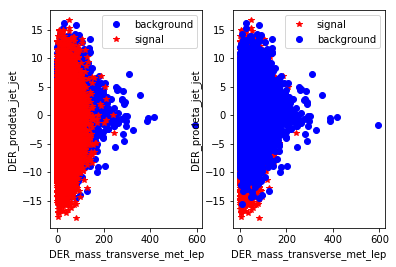

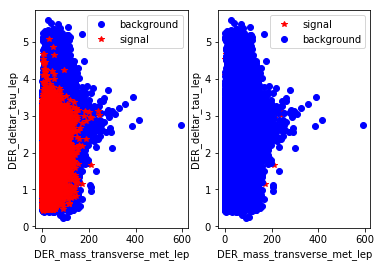

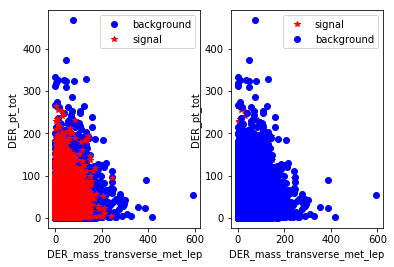

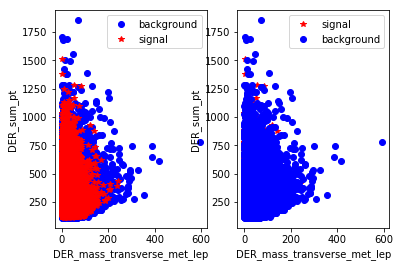

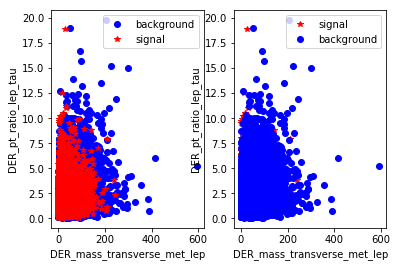

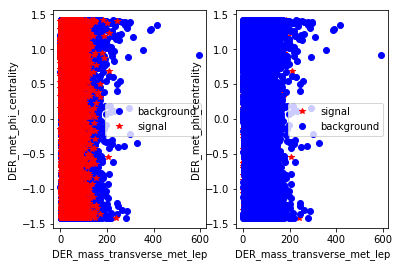

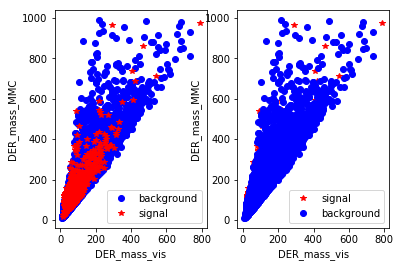

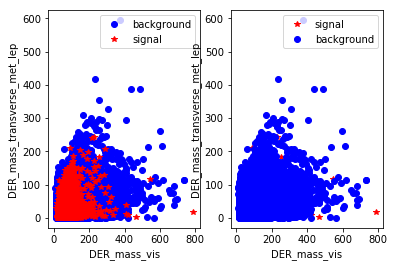

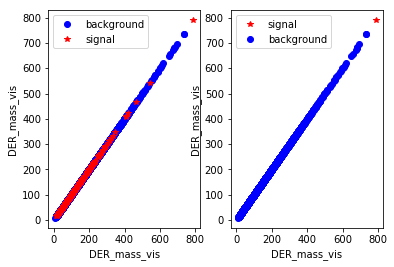

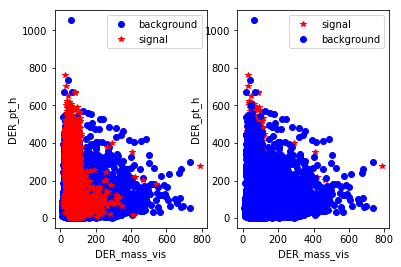

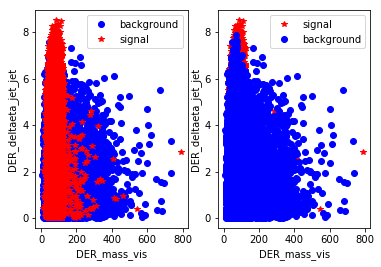

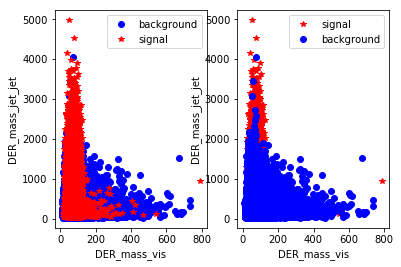

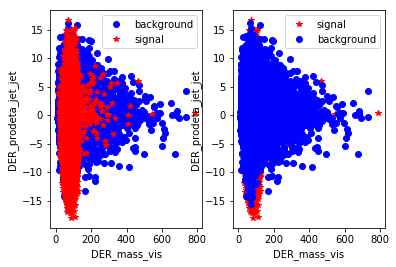

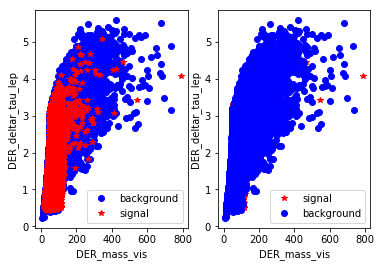

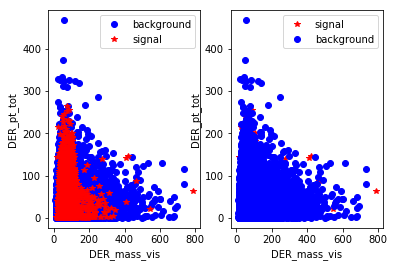

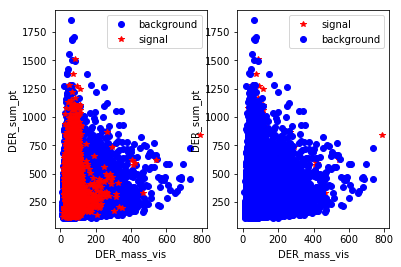

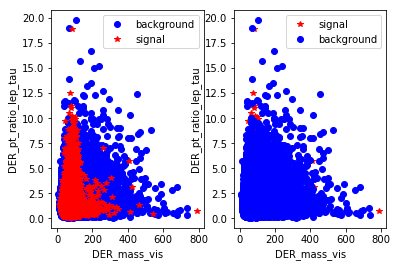

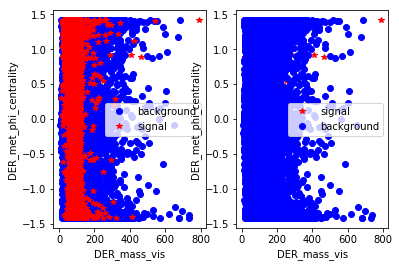

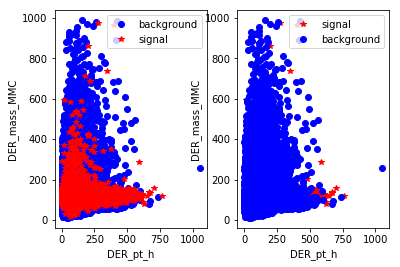

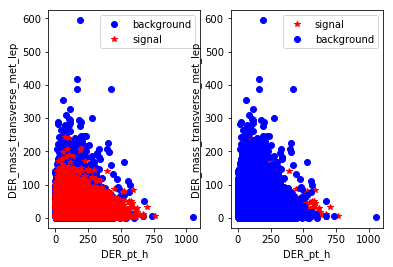

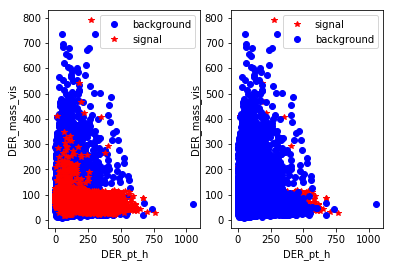

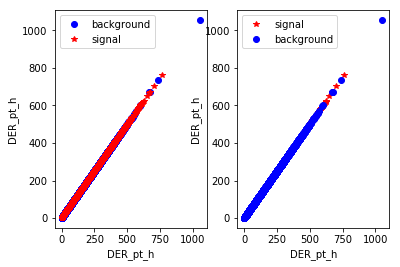

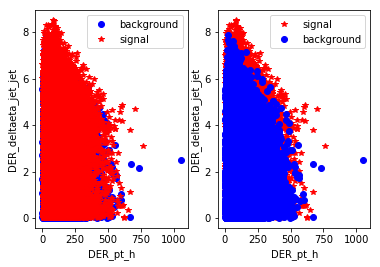

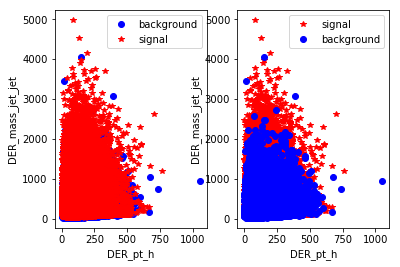

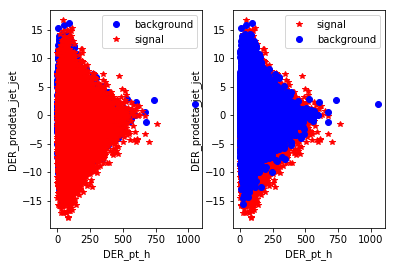

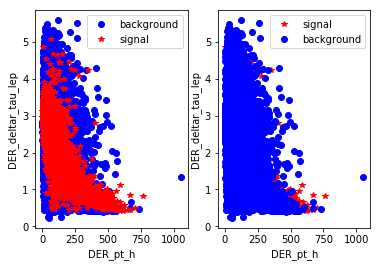

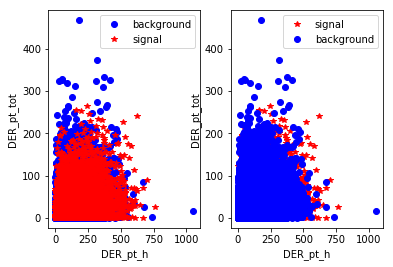

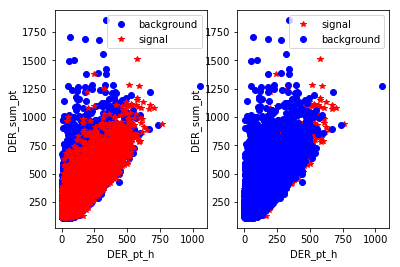

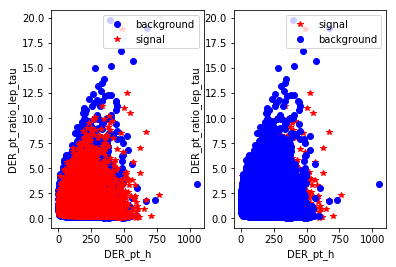

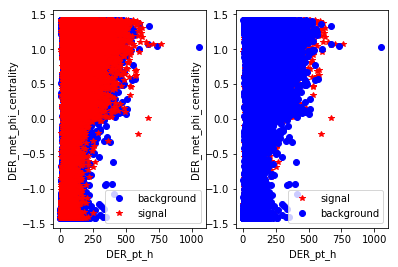

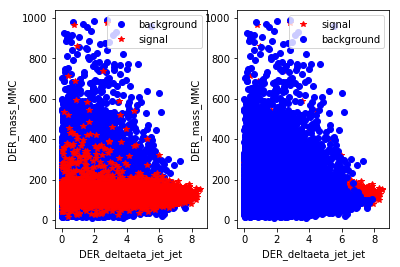

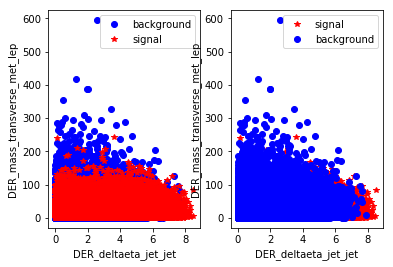

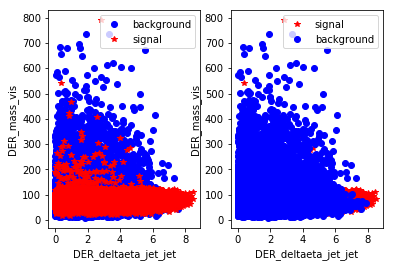

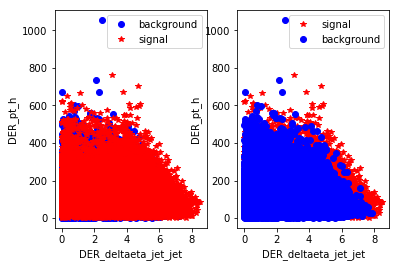

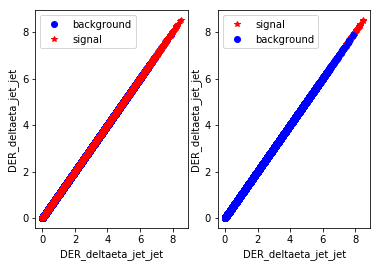

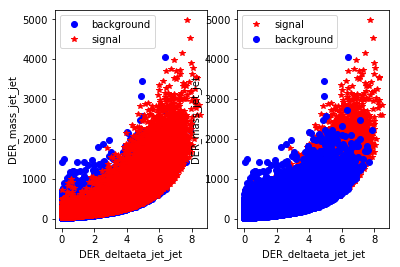

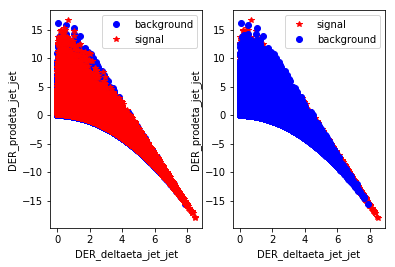

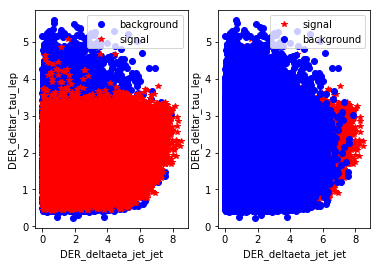

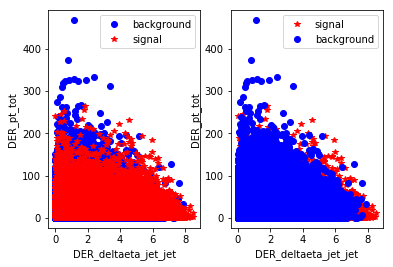

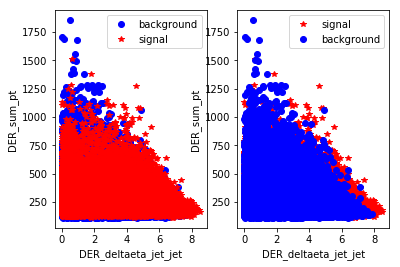

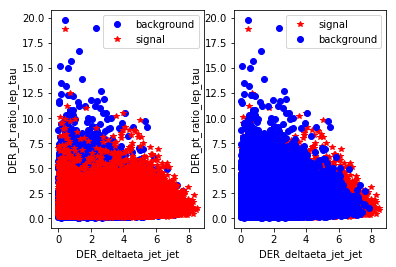

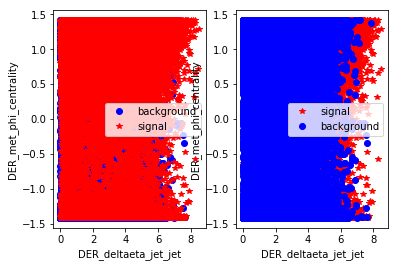

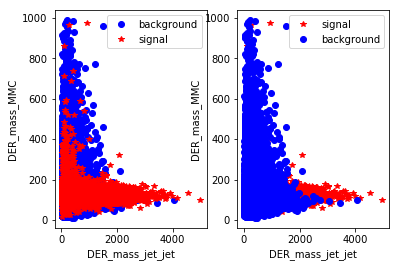

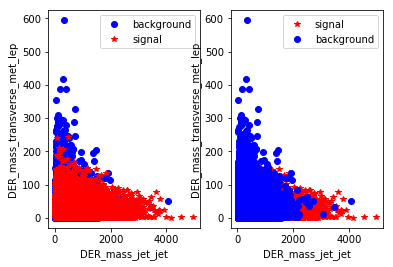

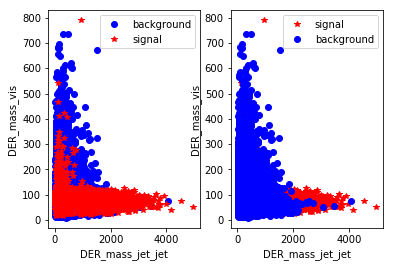

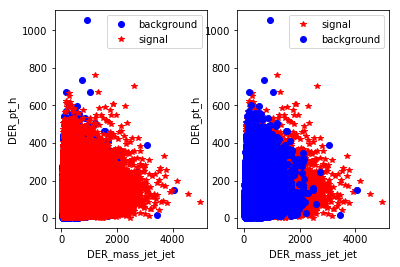

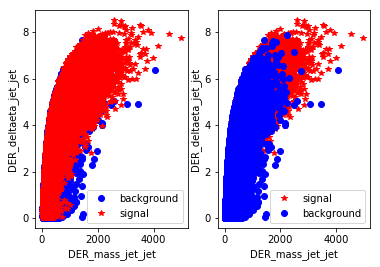

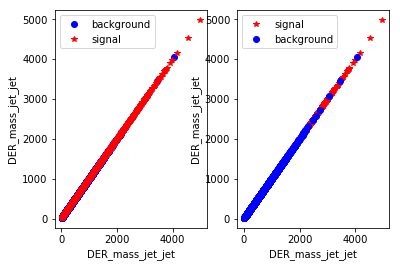

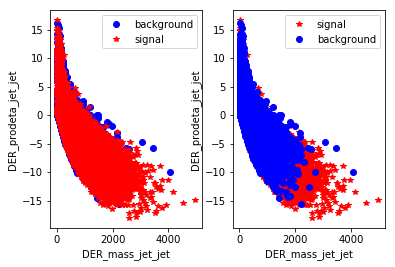

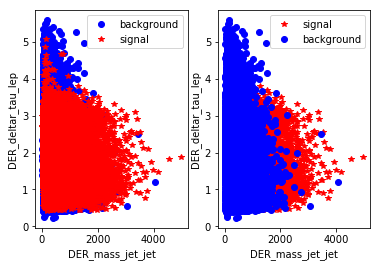

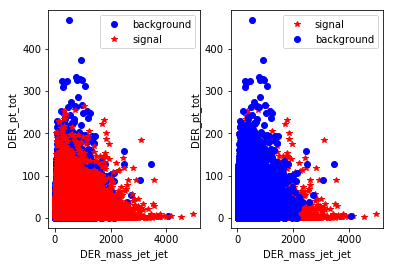

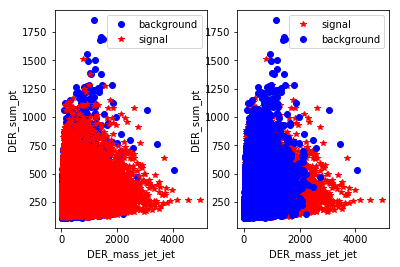

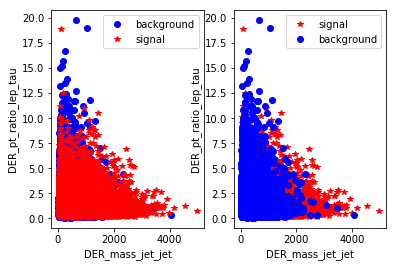

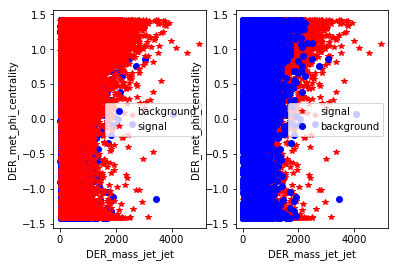

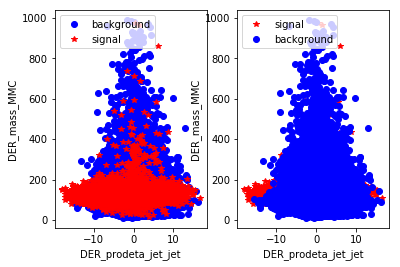

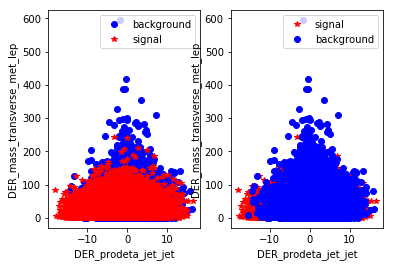

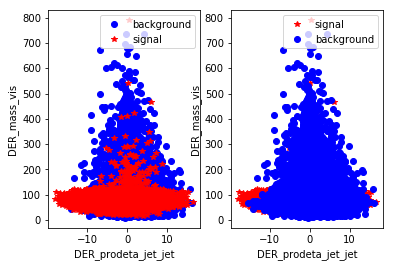

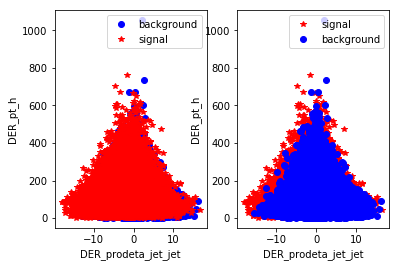

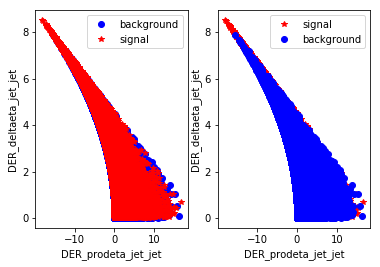

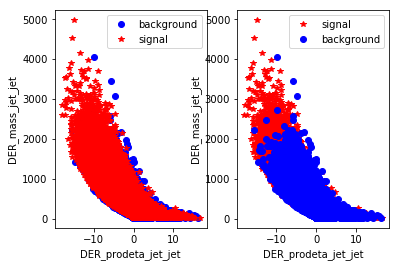

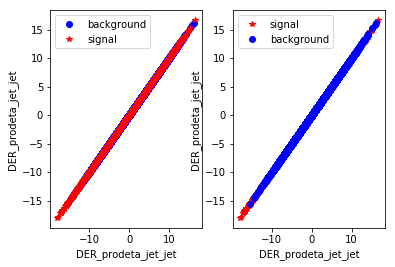

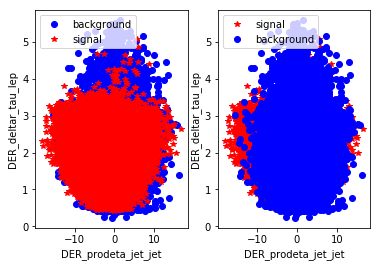

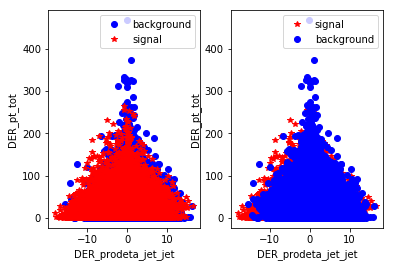

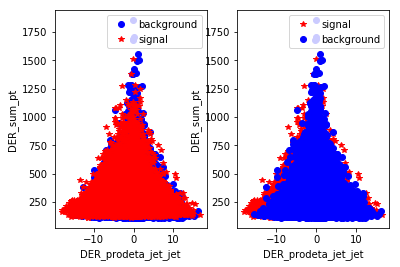

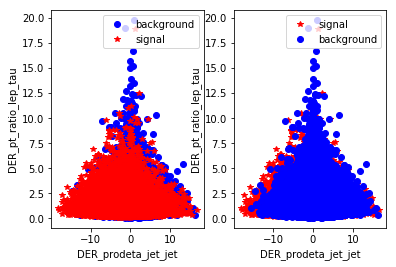

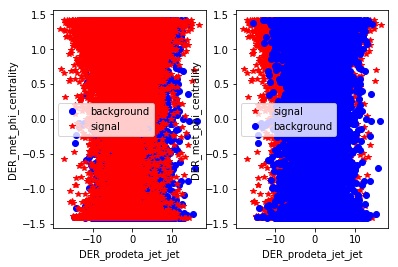

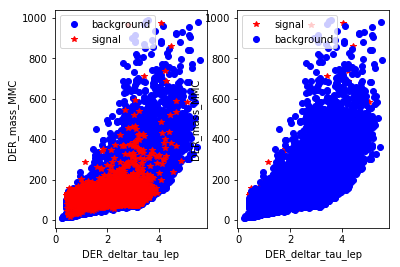

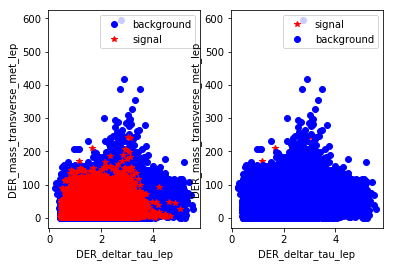

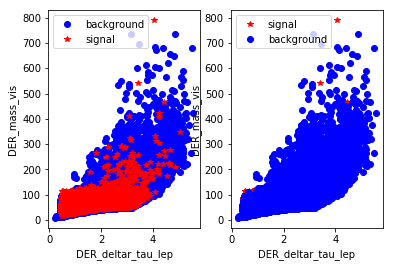

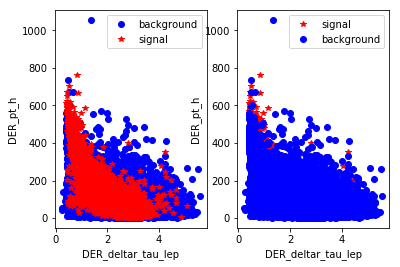

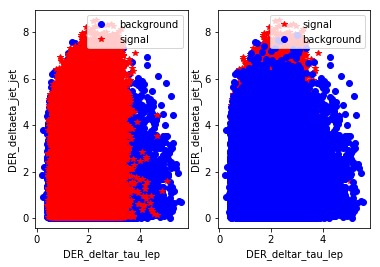

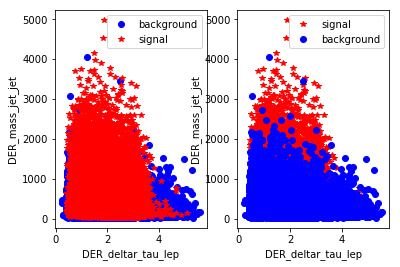

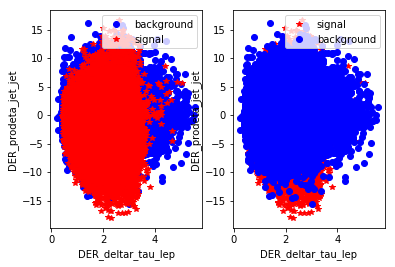

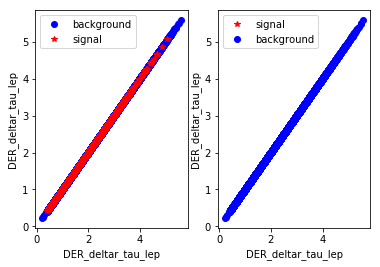

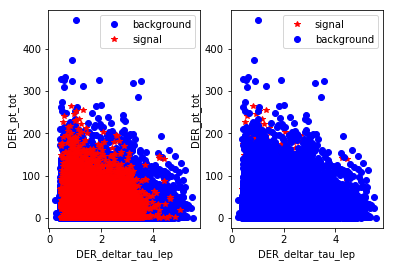

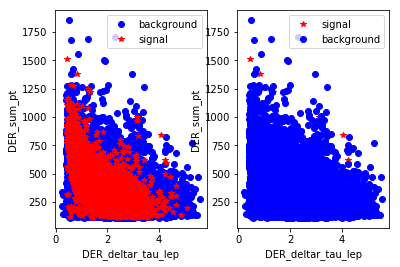

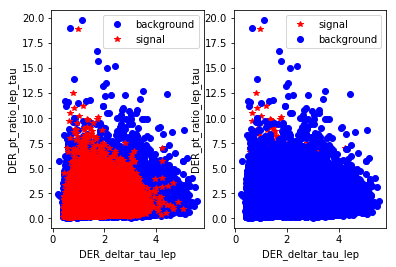

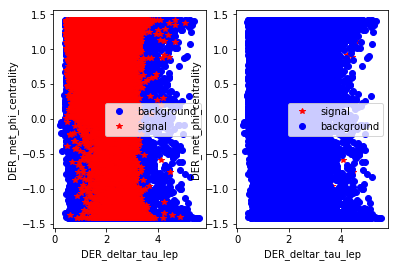

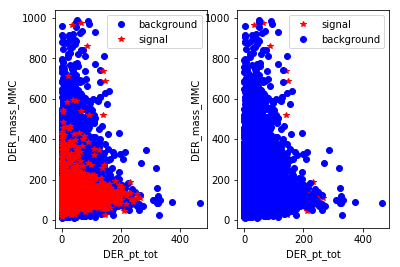

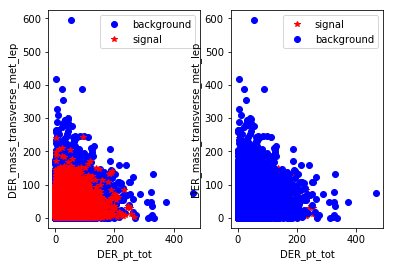

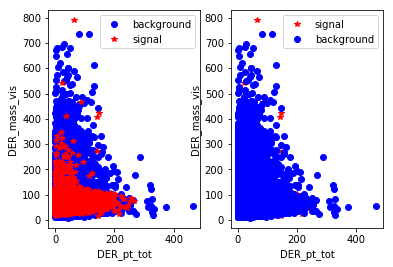

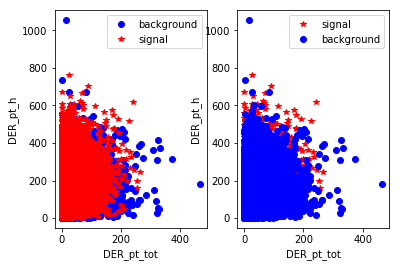

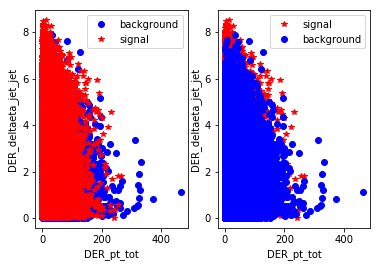

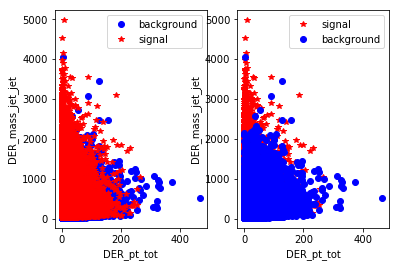

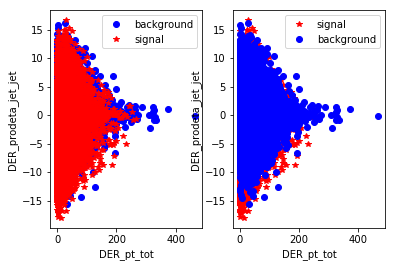

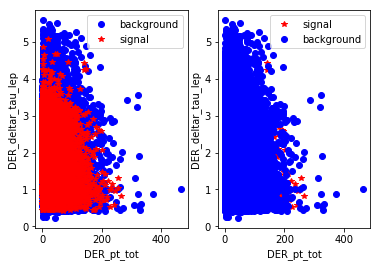

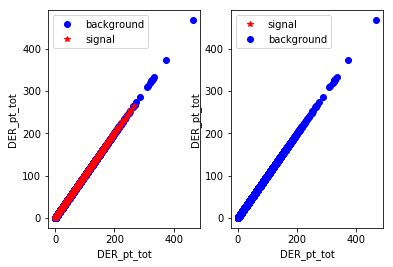

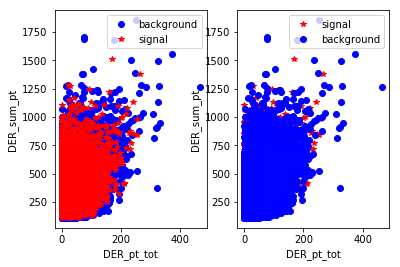

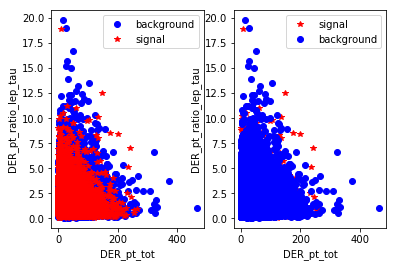

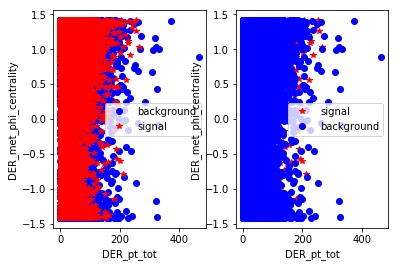

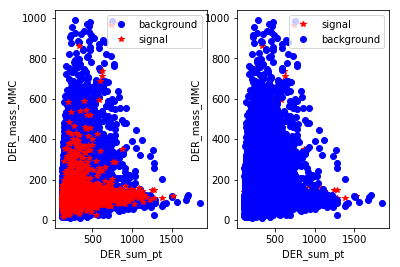

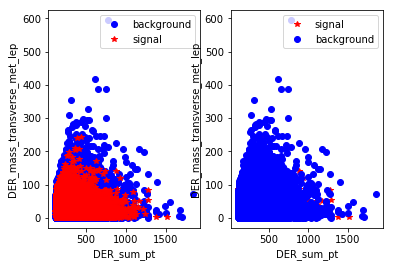

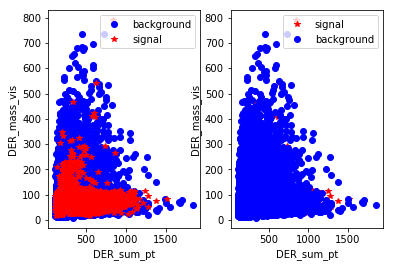

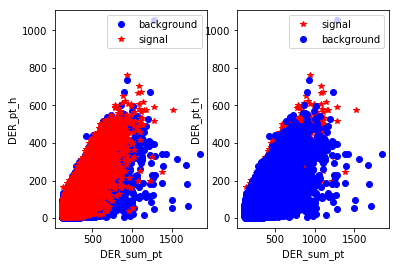

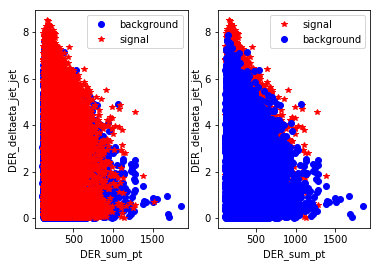

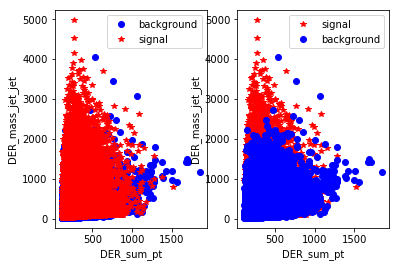

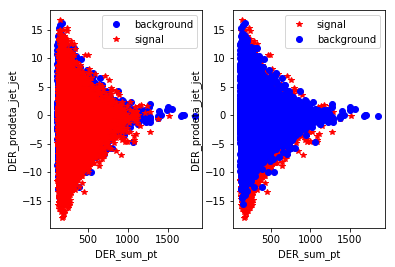

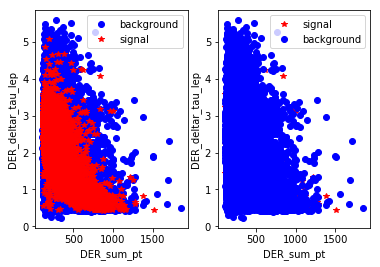

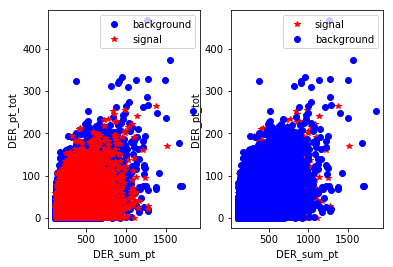

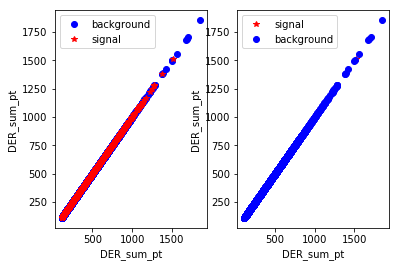

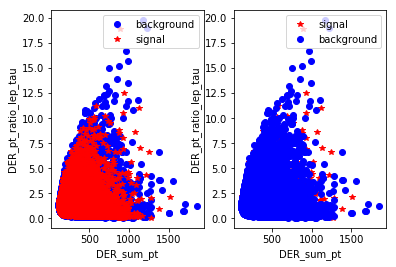

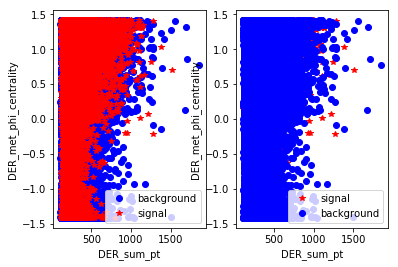

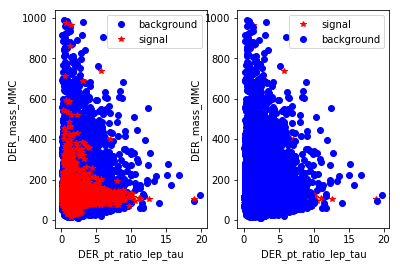

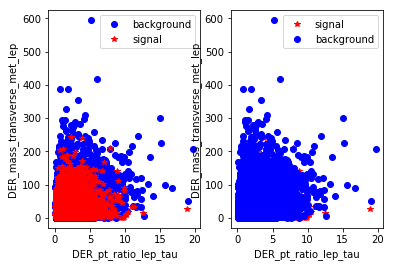

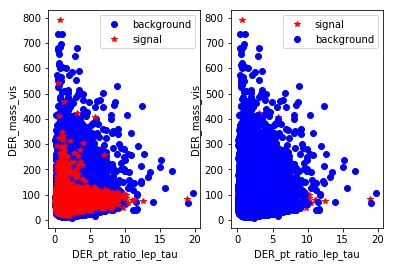

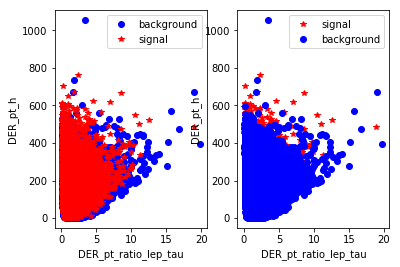

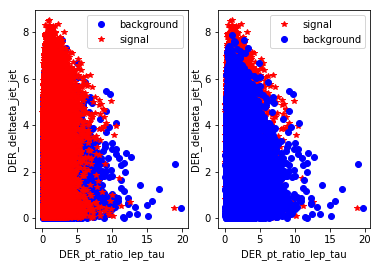

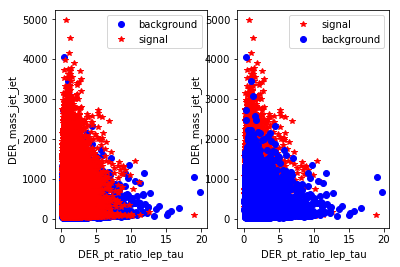

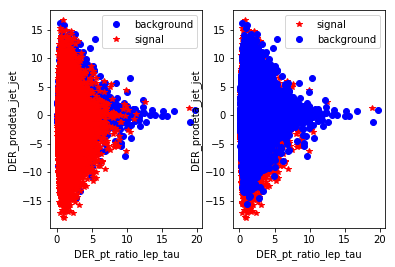

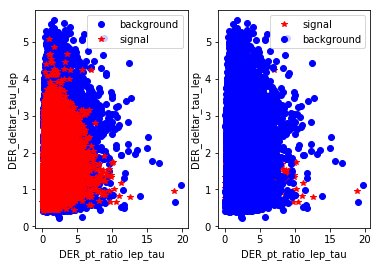

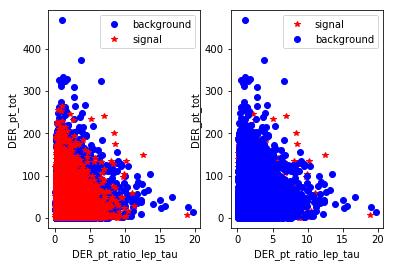

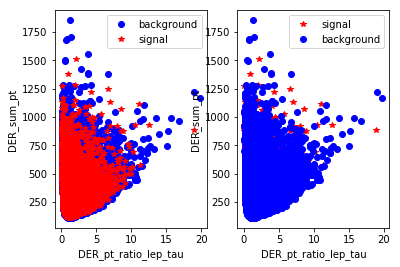

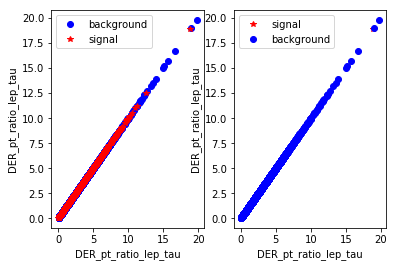

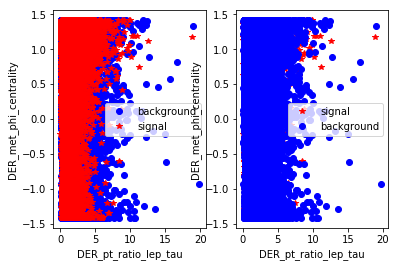

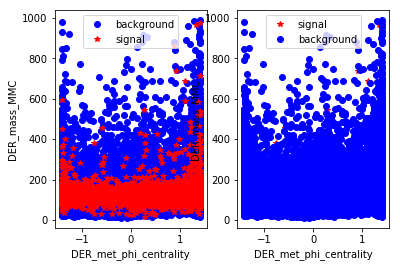

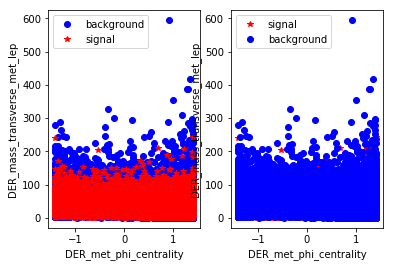

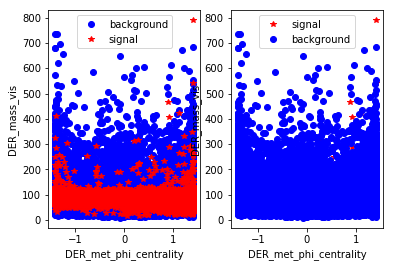

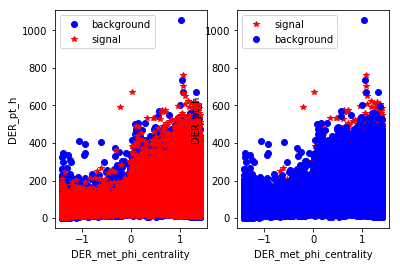

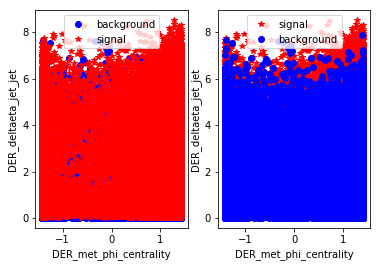

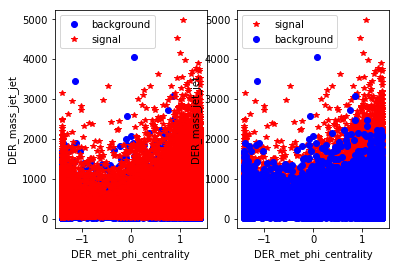

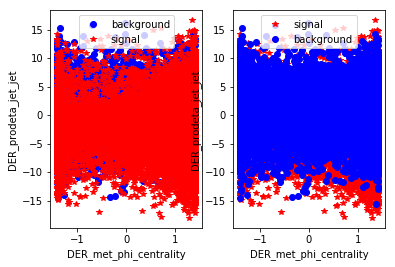

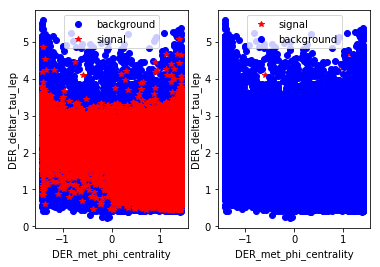

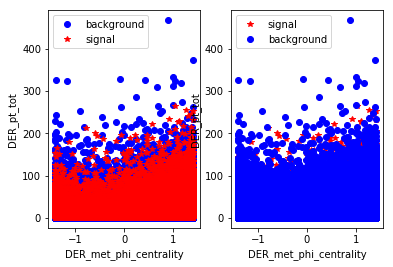

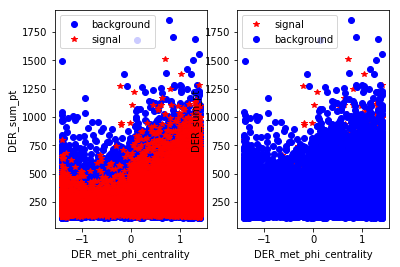

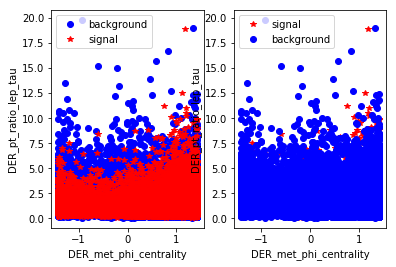

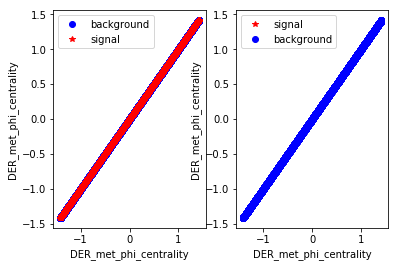

In [17]:
# plot all DER feature spaces after removing the 999
DerNames = featureNames[:13]
for i in np.arange(x_der.shape[1]-1):
    for j in np.arange(x_der.shape[1]-1):
        plotInFeatureSpace(x_der, y_no_999, i, j, DerNames)

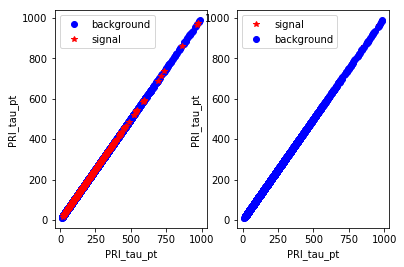

KeyboardInterrupt: 

In [53]:
# read the names of the features in the dataset 'train.csv'
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]
PriNames = featureNames[13:]

# plot all PRI feature spaces after removing the 999
for i in np.arange(x_pri.shape[1]-1):
    for j in range(i,x_pri.shape[1]-1):
        plotInFeatureSpace(x_pri, y_no_999, i, j, PriNames)

# Fisher information

In [33]:
def getFisher(samples, labels):
    
    # get background events in samples (the label in 'labels' is -1)
    ind_background = np.where(labels == -1)
    samples_background = samples[ind_background]
    
    # get signal events in samples (the label in 'labels' is +1)
    ind_signal = np.where(labels == 1)
    samples_signal = samples[ind_signal]
    
    # compute mean and standard deviations
    m_b = np.mean(samples_background)
    m_s = np.mean(samples_signal)
    std_b = np.std(samples_background)
    std_s = np.std(samples_signal)

    # calculate the Fisher information
    fisher = (m_b-m_s)**2 / (std_b + std_s)
    
    return fisher
    return NotImplementedError

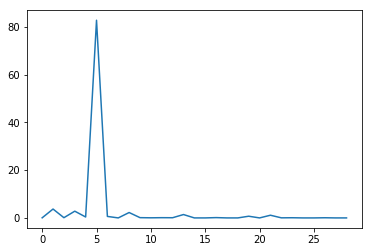

DER_mass_jet_jet (index: 5 ,fisher value: 82.776576819 )
DER_mass_transverse_met_lep (index: 1 ,fisher value: 3.71551922092 )
DER_pt_h (index: 3 ,fisher value: 2.82363445707 )
DER_pt_tot (index: 8 ,fisher value: 2.25625630835 )
PRI_tau_pt (index: 13 ,fisher value: 1.4101818535 )
PRI_met_sumet (index: 21 ,fisher value: 1.12690470857 )
PRI_met (index: 19 ,fisher value: 0.70958445901 )
DER_prodeta_jet_jet (index: 6 ,fisher value: 0.629172249061 )
DER_deltaeta_jet_jet (index: 4 ,fisher value: 0.386234002813 )
PRI_lep_pt (index: 16 ,fisher value: 0.130444827101 )


In [52]:
# compute the fisher information value for all the features without 999
fisher_all_no_999 = []
for i in np.arange(X_no_999.shape[1]-1):
    fisher_all_no_999.append(getFisher(X_no_999[:,i], y_no_999))

# plot them
plt.figure
plt.plot(np.arange(len(fisher_all_no_999)),fisher_all_no_999)  
plt.show()

# extract the P best features
P = 10
ind_sort = np.argsort(fisher_all_no_999)
for i in range(1,P+1):
    print(featureNames[ind_sort[-i]],'(index:',ind_sort[-i],',fisher value:',fisher_all_no_999[ind_sort[-i]],')')


In [49]:
print(featureNames)

['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']


# Least Square GD

In [23]:
# PRI and DER 
initial_w = np.zeros(X_no_999.shape[1])
max_iters = 500
gamma = 0.000001
#w_ls, loss_ls = least_squares_GD(y_no_999, X_no_999, initial_w, max_iters, gamma)

# DER
initial_w = np.zeros(x_der.shape[1])
max_iters = 500
gamma = 0.00001
w_ls, loss_ls = least_squares_GD(y_no_999, x_der, initial_w, max_iters, gamma)

(68109,)
(68109, 2)
[ 0.  0.]
Gradient Descent(9/9): loss MSE=0.4999973563379433, w0=1.6260062291235309e-06, w1=-1.2515065854022904e-08


# Least Square SGD

In [21]:
# PRI and DER 
initial_w = np.zeros(X_no_999.shape[1])
max_iters = 500
gamma = 0.000001
w_ls, loss_ls = least_squares_SGD(y_no_999, X_no_999, initial_w, max_iters, gamma)

# DER
initial_w = np.zeros(x_der.shape[1])
max_iters = 500
gamma = 0.00001

w_ls, loss_ls = least_squares_SGD(y_no_999, x_der, initial_w, max_iters, gamma)

Gradient Descent(499/499): loss MSE=1.103099596225925, w0=-0.0003815810007730835, w1=-0.002314638849754636
Gradient Descent(499/499): loss MSE=558887792.6928523, w0=36.10157261296971, w1=1.508332176384426
